## Load data that has been cleaned and prepped
### See [this notebook](https://colab.research.google.com/drive/1YNYzk3FNFM9V7HJ_uYog3C0ycX4SwxvM#scrollTo=LeNsJD4SWWCZ) for data preparation details

In [0]:
# Import required packages:
import pandas as pd
import numpy as np
from google.colab import files, drive

In [0]:
# Connect to Google Drive (to load raw data)
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

### Import Development Datasets: "train_set", "test_set", and "tiny"

In [0]:
# Download "tiny"" dataset:
csv_files = {
  'train': '1puSE81puoJY5_xbqNX79dj6NJlMk6sYv',
  'test': '1-0JSgOsONw1Cstsjgyzllu9Gnjq0LUb5',
  'tiny': '1cPVbl96VIdUr8Zyf5gJuLqqtb8g9uQgw',
}

dfs = {}

for key, value in csv_files.items():
  csv_name = key + '.csv'
  downloaded = drive.CreateFile({'id': value})
  downloaded.GetContentFile(csv_name)
  dfs[key] = pd.read_csv(csv_name, low_memory=False)
  print("Done with: ", key)

train = dfs['train'].drop(['date'], axis=1)
test = dfs['test'].drop(['date'], axis=1)
tiny = dfs['tiny']

Done with:  tiny


,user_id,business_id,stars
0,jjogE_kPPMjxKvDEFlct6w,FhPCN9WaTm5CACtonWhehA,5.0
1,sKVpHfhkG_Nvgf_Vfb91Cg,487ZwV1pjttfx_kdqtIl3Q,4.0
2,xsBjO0GTAvZK8i2A8_z20g,KUlm5OuKYJ6nGj0EUwcY9w,4.0
3,ELfzWgdf64VBLi5z1ECItw,-iFvYhgysvjkxckCr42NRw,5.0
4,oc3u68ugJlAP__025Ji2fw,RrXlDMjW30v2KatCxOobdQ,3.0
...,...,...,...
21929,QG9ZJatKSWj5p5VrW3cfMA,EfmP_Rn43N0XbqbiBShG9A,5.0
21930,ayoslNT7RdE-LyzS-fJVFA,AaeG-UJAMeibb07eV_q3-A,4.0
21931,KgFOJnWXxVuz0b-xfo6jjw,eYeFOcNJO2iTNPCPi8XAxw,4.0
21932,1fPiKjZhkGWLya1QLkwlhQ,2lF1UsGcDpDpaI1lXgRX_g,4.0


### Create and save "tiny" dataset (for development)

In [0]:
# Get active users only:
# user_counts = r["user_id"].value_counts()
# active_user_index = user_counts.loc[user_counts >= 5].index.to_list()

# tiny_users = active_user_index[1000:1100]
# tiny = rs[rs.user_id.isin(tiny_users)].sort_values(by = 'user_id')

# tiny.to_csv('tiny.csv', index=False)
# fid = '138BMjfpGmQescIUmfX_4TA6A2l6g_eP_'

# t = drive.CreateFile({"parents": [{"kind": "drive#fileLink", "id": fid}]})
# t.SetContentFile('tiny.csv')
# t.Upload()

### Import full ratings data (then convert to active-users only)

In [0]:
csv_files = {
  'rating': '1kUiiQxmaRevPbMVryD_9kxOT3hL0yXbT',
  'user': '1wgtFyCliBnHf3814uG6OWLD_JTtKOYj4',
  'business': '1lTKDsBNMMYJ9cthYQUvS6gqPauk_YGY5',
  # 'checkin': '1AVdM2PY56JOvDBUJimAZ7tHnKU2Dyczb',
  # 'tip': '1zQhiSZgadQyMFA0UjDkfti_AbDDkonU-',
  # 'photo': '129APnJqG63D_C_MDhJsBrlQFZzdNlU11',
}

# Create a dictionary of dataframes:
dfs = {}

for key, value in csv_files.items():
  csv_name = key + '.csv'
  downloaded = drive.CreateFile({'id': value})
  downloaded.GetContentFile(csv_name)
  dfs[key] = pd.read_csv(csv_name, low_memory=False)
  print("Done with: ", key)



Done with:  rating
Done with:  user
Done with:  business


In [0]:
b = dfs['business']
# t = dfs['tip']
r = dfs['rating']
u = dfs['user']

## Summarize Missing Data

In [0]:
def summarize_missing_data(df):
  df_len = len(df)
  col_name = []
  pct_missing = []
  for col in list(df.columns):
    col_name.append(col)
    pct_missing.append(round(100.0 * df[col].isnull().sum() / df_len, 2))

  return pd.DataFrame({'Column': col_name, 'Pct_Missing': pct_missing})

print(summarize_missing_data(b))
print(summarize_missing_data(u))
print(summarize_missing_data(r))

          Column  Pct_Missing
0    business_id         0.00
1           name         0.00
2        address         3.99
3           city         0.00
4          state         0.00
5    postal_code         0.34
6       latitude         0.00
7      longitude         0.00
8          stars         0.00
9   review_count         0.00
10       is_open         0.00
11    attributes        14.97
12    categories         0.25
13         hours        23.28
                Column  Pct_Missing
0              user_id         0.00
1                 name         0.00
2         review_count         0.00
3        yelping_since         0.00
4               useful         0.00
5                funny         0.00
6                 cool         0.00
7                elite        95.64
8              friends         0.00
9                 fans         0.00
10       average_stars         0.00
11      compliment_hot         0.00
12     compliment_more         0.00
13  compliment_profile         0.00
14     com

## Join Ratings, Businesses, and Users

In [0]:
r_relevant = r[['review_id','user_id','business_id','stars','text']]
b_relevant = b[['business_id','city','state','is_open','attributes','categories']]
u_relevant = u[['user_id','name','elite','friends','fans','useful']]
super = pd.merge(pd.merge(r_relevant, b_relevant, on='business_id',how='left'), u_relevant, on='user_id', how='left')

In [0]:
super.head()

,review_id,user_id,business_id,stars,text,city,state,is_open,attributes,categories,name,elite,friends,fans,useful
0,Q1sbwvVQXV2734tPgoKj4Q,hG7b0MtEbXx5QzbzE6C_VA,ujmEBvifdJM6h6RLv4wQIg,1.0,Total bill for this horrible service? Over $8G...,Las Vegas,NV,1.0,"{'ByAppointmentOnly': 'False', 'GoodForKids': ...","Fitness & Instruction, Doctors, Health & Medic...",Stefan,NaN,frQs7y5qa-X1pvAM0sJe1w,0.0,18.0
1,GJXCdrto3ASJOqKeVWPi6Q,yXQM5uF2jS6es16SJzNHfg,NZnhc2sEQy3RmzKTZnqtwQ,5.0,I *adore* Travis at the Hard Rock's new Kelly ...,Las Vegas,NV,1.0,"{'RestaurantsPriceRange2': '2', 'BusinessAccep...","Beauty & Spas, Hair Stylists, Makeup Artists, ...",Jackie,2009,"6IAFtw20e4y99D2cA3jj9g, 33O8Q0BdTl-PXh2lKceYgg...",3.0,178.0
2,2TzJjDVDEuAW6MR5Vuc1ug,n6-Gk65cPZL6Uz8qRm3NYw,WTqjgwHlXbSFevF32_DJVw,5.0,I have to say that this office really has it t...,Chandler,AZ,1.0,"{'ByAppointmentOnly': 'True', 'BusinessAccepts...","Health & Medical, Cosmetic Dentists, Orthodont...",Wilhelmina,NaN,"9YRFLVFVbHGAJ1weFx5zqw, hUgdQsMQPoNc3fa9VoMqWQ",1.0,13.0
3,yi0R0Ugj_xUx_Nek0-_Qig,dacAIZ6fTM6mqwW5uxkskg,ikCg8xy5JIg_NGPx-MSIDA,5.0,Went in for a lunch. Steak sandwich was delici...,Calgary,AB,1.0,"{'HasTV': 'True', 'RestaurantsReservations': '...","Bars, Pubs, Nightlife, Tapas Bars, Restaurants",Simon,NaN,"zWEBQSaDqrB9l8AWGy06DQ, VDFV_x-IyCNkgtr2EB-VLw...",0.0,2.0
4,11a8sVPMUFtaC7_ABRkmtw,ssoyf2_x0EQMed6fgHeMyQ,b1b1eb3uo-w561D0ZfCEiQ,1.0,Today was my second out of three sessions I ha...,Scottsdale,AZ,1.0,"{'WheelchairAccessible': 'False', 'BusinessAcc...","Teeth Whitening, Beauty & Spas",Reilly,NaN,"jrw1jRpoRgK6ZQ4Z5_hPng, GJgchmwqQghjuG14uWgIOA...",0.0,7.0


## Feature Engineering:

In [0]:
## BIZ CATEGORIES
# This is pretty messy. There are >1k categories, and each business can belong to several.

test = super.head(n=20000)
string_categories = test.loc[:, ('categories') ].astype(str)
list_of_categories = list(set(string_categories.str.split(", ").sum()))
print(len(list_of_categories))
print(list_of_categories)

917
['Car Buyers', 'Middle Schools & High Schools', 'Blow Dry/Out Services', 'Tanning', 'Title Loans', 'Beer', 'Interior Design', 'RV Parks', 'Waffles', 'Gastroenterologist', 'Florists', 'Noodles', 'Cosmetology Schools', 'Aestheticians', 'Home Automation', 'Moroccan', 'Outlet Stores', 'Venues & Event Spaces', 'Metal Fabricators', 'Scavenger Hunts', 'Ramen', 'Saunas', 'Wigs', 'Burmese', 'Door Sales/Installation', 'Costumes', 'Jewelry', 'Makeup Artists', 'Toy Stores', 'Window Washing', 'Videos & Video Game Rental', 'Electronics Repair', 'Chinese', 'Post Offices', 'Floral Designers', 'Elementary Schools', 'Vinyl Records', 'Bed & Breakfast', 'Dive Bars', 'Driving Schools', 'Books', 'Shopping Centers', 'Process Servers', 'Diving', 'Magicians', 'Hotels & Travel', 'Nurseries & Gardening', 'Laser Tag', 'Sri Lankan', 'Soup', 'French', 'Real Estate Agents', 'Arabian', 'Counseling & Mental Health', 'Vietnamese', 'Educational Services', 'Irish Pub', 'Diagnostic Imaging', 'Food Trucks', 'Donuts', '

In [0]:
## BIZ ATTRIBUTES
# Pretty challenging to parse the JSON. Using categories above will actually be easier.

import json

x = super.head().copy()

def make_dict(row):
  tmp = str(row['attributes']).replace("\'", "\"")
  tmp = tmp.replace(" True", "\"True\"").replace(" False", "\"False\"")
  # return json.loads(tmp)
  return tmp

x['att2'] = x.apply(make_dict, axis=1)
x['att2'][1]

'{"RestaurantsPriceRange2": "2", "BusinessAcceptsCreditCards": "True", "WheelchairAccessible": "True", "BusinessParking": "{"garage":"True", "street":"False", "validated":"False", "lot":"False", "valet":"False"}", "GoodForKids": "True", "ByAppointmentOnly": "False", "BikeParking": "True"}'

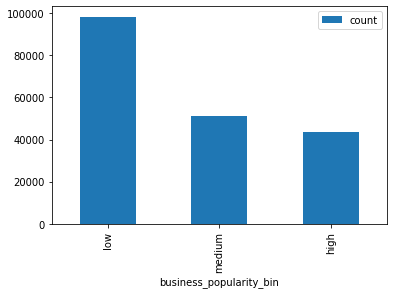

In [0]:
# BUSINESS Popularity: `business_popularity_class`
# Create three classes of popularity: low, medium, high

counts = pd.DataFrame(super.groupby('business_id')['stars'].agg(['count', 'mean', 'median', 'std']).sort_values(by='count', ascending=False))
bins = [1, 10, 30, 1000000]
# Classes: low = 1-5, medium = 10-30, high = 30+
counts['business_popularity_bin'] = pd.cut(counts['count'], bins, right=False, labels=['low','medium','high'])
counts.groupby(['business_popularity_bin'])['count'].agg(['count']).plot(kind='bar')

# Define 3 classes of business popularity
business_popularity_class = pd.DataFrame(counts['business_popularity_bin'])
# business_popularity_class

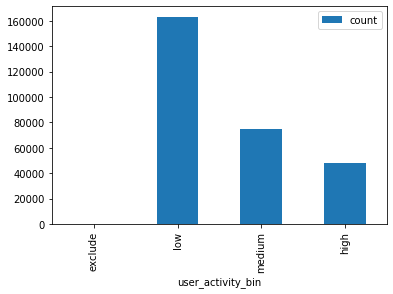

In [0]:
# USER Activity: `user_activity_class`
# Create three classes of user activity: low, medium, high

counts = pd.DataFrame(super.groupby('user_id')['stars'].agg(['count', 'mean', 'median', 'std']).sort_values(by='count', ascending=False))
bins = [1, 5, 10, 20, 1000000]
# Classes: exclude = 1-4, low = 5-10, medium = 11-20, high = 20+
counts['user_activity_bin'] = pd.cut(counts['count'], bins, right=False, labels=['exclude','low', 'medium','high'])
counts[~counts['user_activity_bin'].isin(['exclude'])].groupby(['user_activity_bin'])['count'].agg(['count']).plot(kind='bar')

# Define 3 classes of user activity
user_activity_class = pd.DataFrame(counts['user_activity_bin'])
# user_activity_class

## Create "categorization" dataframe

In [0]:
categorization = super[['review_id','user_id','business_id','stars','city','state','is_open']]
categorization = pd.merge(categorization, business_popularity_class, on='business_id',how='left')
categorization = pd.merge(categorization, user_activity_class, on='user_id',how='left')

categorization.head()

,review_id,user_id,business_id,stars,city,state,is_open,business_popularity_bin,user_activity_bin
0,Q1sbwvVQXV2734tPgoKj4Q,hG7b0MtEbXx5QzbzE6C_VA,ujmEBvifdJM6h6RLv4wQIg,1.0,Las Vegas,NV,1.0,high,medium
1,GJXCdrto3ASJOqKeVWPi6Q,yXQM5uF2jS6es16SJzNHfg,NZnhc2sEQy3RmzKTZnqtwQ,5.0,Las Vegas,NV,1.0,high,exclude
2,2TzJjDVDEuAW6MR5Vuc1ug,n6-Gk65cPZL6Uz8qRm3NYw,WTqjgwHlXbSFevF32_DJVw,5.0,Chandler,AZ,1.0,high,low
3,yi0R0Ugj_xUx_Nek0-_Qig,dacAIZ6fTM6mqwW5uxkskg,ikCg8xy5JIg_NGPx-MSIDA,5.0,Calgary,AB,1.0,medium,exclude
4,11a8sVPMUFtaC7_ABRkmtw,ssoyf2_x0EQMed6fgHeMyQ,b1b1eb3uo-w561D0ZfCEiQ,1.0,Scottsdale,AZ,1.0,high,exclude


In [0]:
# Save `categorization` to drive:
def upload_csv_to_drive(destination_folder, dataframe, csv_filename):
  dataframe.to_csv(csv_filename, index=False)
  tmp = drive.CreateFile({"parents": [{"kind": "drive#fileLink", "id": destination_folder}]})
  tmp.SetContentFile(csv_filename)
  tmp.Upload()
  print("Upload complete for: ", csv_filename)

upload_csv_to_drive("138BMjfpGmQescIUmfX_4TA6A2l6g_eP_", categorization, "categorization.csv")

Upload complete for:  categorization.csv


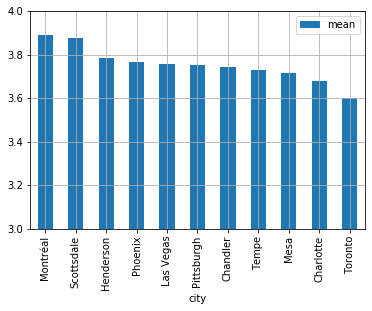

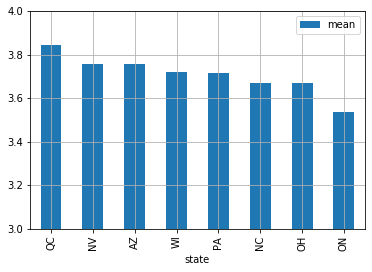

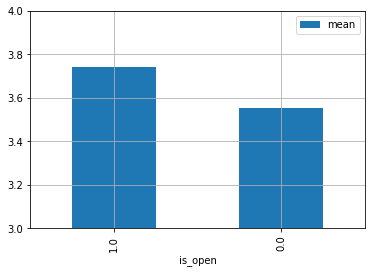

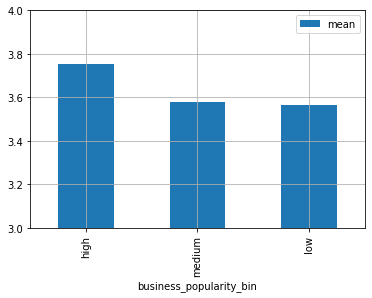

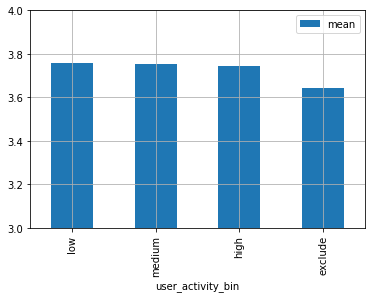

In [0]:
# For every categorical variable, count reviews, distribution, and standard deviation:
# Show only categorical values that represent at least 2% of reviews:

def aggregate(df, categorical_var, metric):
  counts = pd.DataFrame(df.groupby(categorical_var)['stars'].agg(['count', 'mean', 'median', 'std']).sort_values(by='count', ascending=False))
  counts['pct'] = round(100.0 * counts['count'] / counts.sum()['count'], 2)
  threshold = len(counts[counts['pct'] >= 2.0])
  counts[[metric]].head(n=min(threshold, 20)).sort_values(by=metric, ascending=False).plot(kind='bar', y=metric, ylim=[3.0,4.0], grid=True)
  return

for col in ['city', 'state', 'is_open', 'business_popularity_bin', 'user_activity_bin']:
  aggregate(categorization, col, 'mean')

